In [35]:
import pandas as pd
from sklearn.cluster import KMeans

# import train_test_split 
from sklearn.model_selection import train_test_split
from os import listdir
from methods import ARTICLES_DIR
from typing import List,Dict
import matplotlib.pyplot as plt


TODO:
 1. load all the documents
 2. vectorize each document, 1 for word existing in the document, 0 for not existing
 3. cluster the documents

לטעון את כל המסמכים

להפריד כל מסמך לפי רווח רגיל

לעשות אוסף של המילים

ולעבור כל מסמך ומסמך, האם מילה קיימת או לא.

בלי stemming ובלי הורדת מילות טפל

In [2]:
paths=[ARTICLES_DIR,
       f"{ARTICLES_DIR}/other groups/5 Technology for cultural heritage/text",
       f"{ARTICLES_DIR}/other groups/12 Visitors guide archeological sites/text files",
       f"{ARTICLES_DIR}/other groups/14 Information presentation museum/txt"
    ]

In [3]:
# כתוב פונקציה שמקבלת מחרוזת, מחזירה מערך של מחרוזות של המילים במחרוזת המסופקת
# מוסיפה את הרשימה שחוזרת לתוך אובייקט מסוג set

def split_str(document:str)->List[str]:
    return document.split()


In [4]:
dic:Dict[int,Dict[str,bool]]={}
set_of_words=set()

In [5]:
for path in paths:
    arts=listdir(path)
    for art in arts:
        if art=='.DS_Store': continue
        with open(f"{path}/{art}",'r',encoding="UTF-8") as file:
            try:
                set_of_words.update(split_str(file.read()))
            except:
                print("Error reading file",path,art)


Error reading file /Users/kono/Downloads/drive-download-20220126T141225Z-001/5 Technology for cultural heritage/text pdftotext3.zip


In [6]:
len(set_of_words)
dic.clear()

In [7]:
# dic:Dict[int,Dict[str,bool]]={}
id=1
for path in paths:
    arts=listdir(path)
    for art in arts:
        if art=='.DS_Store': continue
        with open(f"{path}/{art}",'r',encoding="UTF-8") as file:
            try:
                temp:Dict[str,bool]={}
                content=set(file.read().split())
                for word in set_of_words:
                    temp[word]=word in content
                dic[id]=temp
                id+=1
            except:
                print("Error reading file",path,art)


Error reading file /Users/kono/Downloads/drive-download-20220126T141225Z-001/5 Technology for cultural heritage/text pdftotext3.zip


In [9]:
id,len(dic)

(199, 198)

In [10]:
df=pd.DataFrame.from_dict(dic,orient='index')

In [13]:
len(df),len(df.columns)

(198, 150552)

In [14]:
df.head(10)

,SoundObject,"43(5),","Economics,","“cases”,","1997],",vividly.,5.8166**,1032-1052.,1977.,"Clear,",...,Grasshopper,"VISTA,",abolition,doi:10.1016/j.chb.2010.07.031,poem.,"computing,","353),","[nhine,",68.4,Ó
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [20]:
df["category"]=df.index.map(lambda x: int(x//50)+1)

In [82]:
# df : collection of vectors
X=df.drop(["category"],axis=1)
y=df["category"]

X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.10, random_state=47)

In [83]:
from sklearn.neighbors import KNeighborsClassifier

In [84]:
# model=KNeighborsClassifier(n_neighbors=4)

In [85]:
model=KMeans(n_clusters=3)
model.fit(X_train,y_train)

KMeans(n_clusters=3)

In [86]:
pred=model.predict(X_test)

In [87]:
from sklearn.metrics import classification_report,confusion_matrix

In [88]:
print(confusion_matrix(y_test,pred))

[[0 0 0 0 0]
 [7 0 0 0 0]
 [4 0 0 0 0]
 [6 0 0 0 0]
 [3 0 0 0 0]]


In [89]:
print(classification_report(y_test,pred,zero_division=1))

              precision    recall  f1-score   support

           0       0.00      1.00      0.00       0.0
           1       1.00      0.00      0.00       7.0
           2       1.00      0.00      0.00       4.0
           3       1.00      0.00      0.00       6.0
           4       1.00      0.00      0.00       3.0

    accuracy                           0.00      20.0
   macro avg       0.80      0.20      0.00      20.0
weighted avg       1.00      0.00      0.00      20.0



In [90]:
centers = model.cluster_centers_

#import matplotlib figsize
from matplotlib.pyplot import figure


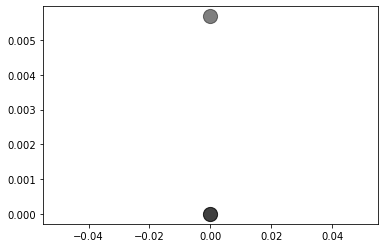

In [91]:
# figure(dpi=400,figsize=(20,8))
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)


In [92]:
len(X_train),len(y_train )
# plt.scatter(X_train,y_train)

(178, 178)